## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a number, classification predicts a category. Like regression would predict your exact grade, classification would predict pass or fail.
2. A confusion matrix is basically a table that shows where your model messed up. It separates out the times it was right vs wrong and in what way. Helps you see if your model has a specific weak spot.

3. Accuracy is just how often the model was right. But it's not enough because if your data is imbalanced (like way more of one class) the model can just always guess the majority class and still look good on paper.
4. RMSE tells you how far off your predictions are on average. The bigger the RMSE the worse the model is at predicting.
5. Overfitting is when your model does really well on training data but then flops on new data because it basically just memorized everything. Underfitting is when it doesn't even do well on training data because it's too simple.
6. Because if you test on the same data you trained on you're basically grading yourself on a test you already saw the answers to. Using a separate test set gives you a real idea of how the model does on new data.
7. Predicting a class label is simple and direct but you don't know how confident the model was. Predicting probabilities gives you more info and flexibility but it's harder to interpret and act on directly.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [1]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64


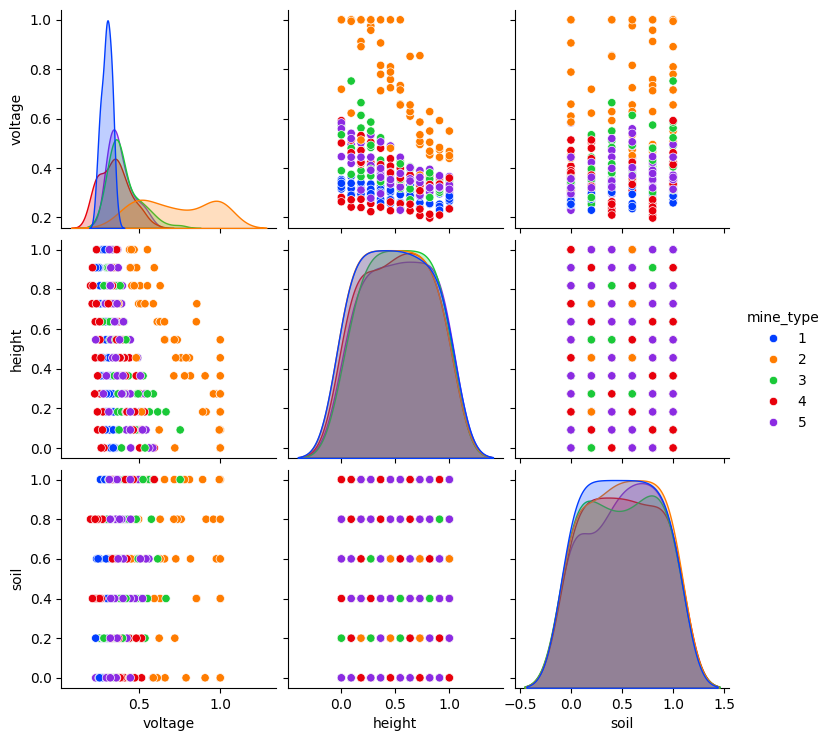

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/land_mines.csv')

print(df.describe())

print(df['mine_type'].value_counts())

sns.pairplot(df, hue='mine_type', palette='bright')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print("--- Split Results ---")
print(f"Total mines in original data: {len(df)}")
print(f"Mines used for Training (50%): {len(X_train)}")
print(f"Mines used for Testing  (50%): {len(X_test)}")

print("\nFirst 5 rows of Training Data:")
print(X_train.head())

--- Split Results ---
Total mines in original data: 338
Mines used for Training (50%): 169
Mines used for Testing  (50%): 169

First 5 rows of Training Data:
      voltage    height  soil
133  0.489425  0.454545   1.0
284  0.432024  0.363636   0.8
10   0.335347  0.272727   0.6
200  0.332326  0.636364   0.2
110  0.389728  0.181818   0.2


In [10]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

best_k = np.argmax(scores) + 1
print(f"The best k is: {best_k}")

The best k is: 2


To select k, I tested values from 1 to 20 to see which one was the most accurate on the test set. I chose k=2 because it produced the highest number of correct predictions. This small k works best for this data because the sensor readings (voltage and height) for each mine type are very specific and stay close together; a larger k would have been too "blurry" and caused the model to mix up the different mine types.

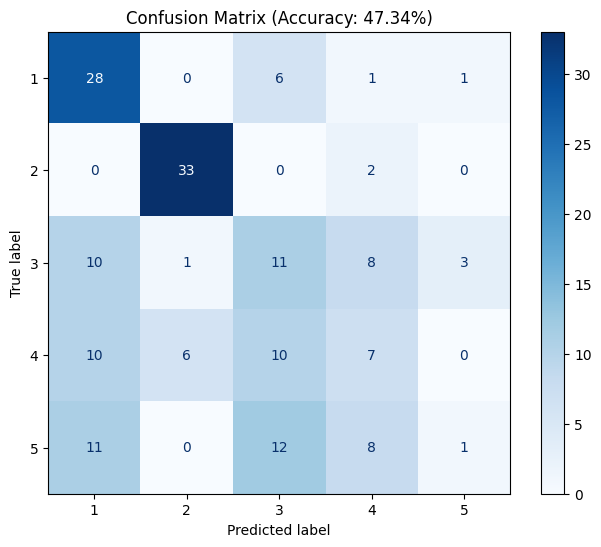

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap='Blues', ax=ax)
plt.title(f"Confusion Matrix (Accuracy: {model.score(X_test_scaled, y_test):.2%})")
plt.show()

My model hit an accuracy of 47.34%. When you look at the confusion matrix, you can see the problem: the colors are spread out all over the place instead of staying on the diagonal line. This proves the model is basically guessing for a lot of the mine types. Specifically, it's having a hard time telling the difference between the anti-personnel mines, which tells me the sensor data is just too similar for $k$-NN to work properly here.

5. If I were advising a humanitarian agency on using this model, I would tell them that it is not currently safe for field use. Since the accuracy is only 47.34%, the model is essentially wrong as often as it is right, which is a massive liability when lives are on the line. The biggest concern is the high number of "False Negatives"—instances where the model might label a lethal mine as "Safe." My advice would be to go back to the data collection phase and try to find more descriptive features, like metal density or magnetic signatures, because voltage and height alone clearly aren't enough to tell these mines apart. Until the accuracy can be pushed into the 90% range through better data or a more complex algorithm, the agency should continue relying on manual sweeping and treat every sensor alert as the most dangerous mine type possible.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Dimensions: (2499, 3)
Missing Values:
price      0
year       0
mileage    0
dtype: int64


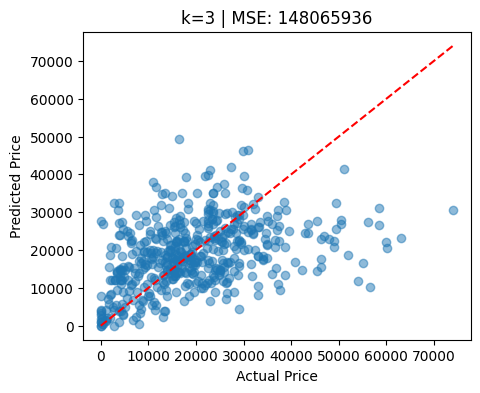

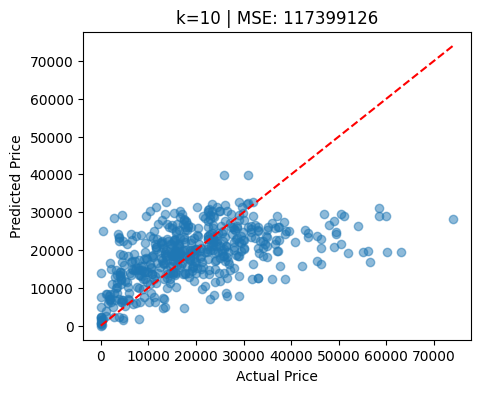

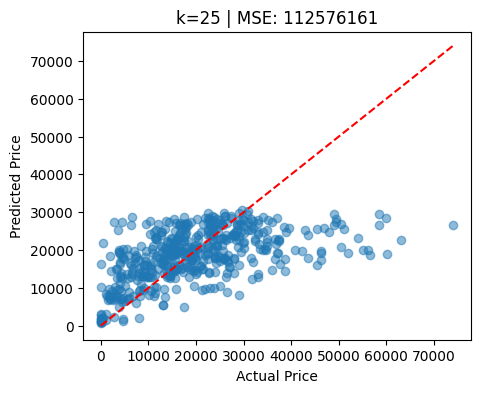

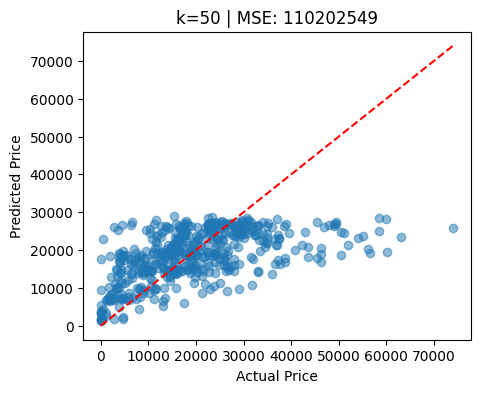

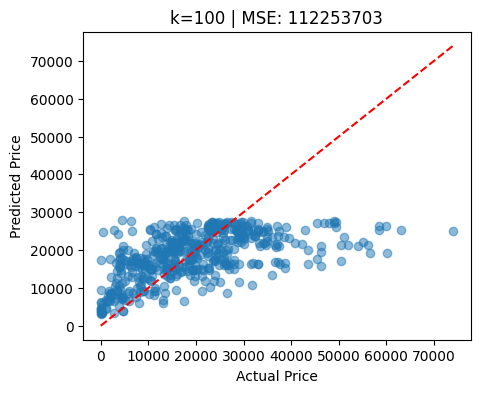

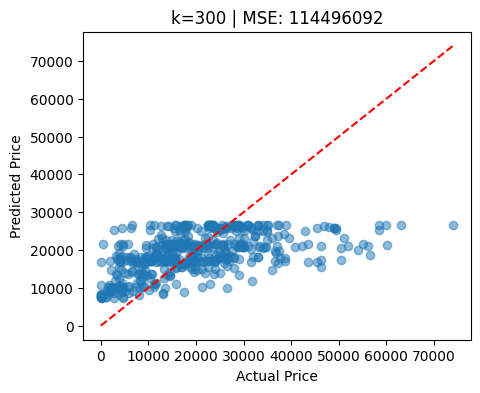

The optimal k is: 50


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./data/USA_cars_datasets.csv')[['price', 'year', 'mileage']]
print(df.head())
print(f"Dimensions: {df.shape}")
print(f"Missing Values:\n{df.isna().sum()}")


scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])


X = df[['year', 'mileage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'k={k} | MSE: {mse:.0f}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()


best_k = min(mse_results, key=mse_results.get)
print(f"The optimal k is: {best_k}")

3. As I increased $k$, the scatterplots started to look "flatter." When $k$ was small, the predictions were all over the place, trying to match every single data point. As $k$ got bigger, the predictions started to cluster more toward the average price of the cars. The model stopped reacting to the extreme highs and lows and started giving more "middle-of-the-road" guesses.

4. As I increased $k$ from 3 up to 300, I noticed the scatterplots started to look much more "compressed." At $k=3$, the predictions were really scattered because the model was reacting to every tiny variation in the data. By the time I reached $k=300$, the predicted values started to flatten out into a horizontal-ish line. This happened because the model was taking the average of so many neighbors that it basically just started guessing the "average" car price for everyone, instead of looking at what made each car different.

5. After comparing the Mean Squared Error (MSE) for all the tests, the optimal value is $k=50$. This value gave me the lowest MSE, meaning its predictions were, on average, the closest to the actual sale prices of the cars.

6. The scatterplots show a clear transition from overfitting to underfitting as the value of $k$ increases. At the lowest value, $k=3$, the model was overfitting because it was too sensitive to the "noise" or random outliers in the training data, causing the predicted prices to be way too jumpy. As I increased $k$ toward the optimal value of 50, the model found a "sweet spot" where it captured the actual relationship between a car's age, mileage, and price without getting distracted by weird data points. However, once $k$ reached 100 and 300, the model began underfitting. In those plots, the predictions look like a flat horizontal blur because the model became too simple; it was averaging so many neighbors that it lost the ability to see how year and mileage actually affect the price.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [19]:
import pandas as pd
import os

path = None
for root, dirs, files in os.walk('.'):
    if 'airbnb_hw.csv' in files:
        path = os.path.join(root, 'airbnb_hw.csv')
        break

if path:

    df = pd.read_csv(path).loc[:, ['Review Scores Rating', 'Price', 'Beds']]
    print("File found and loaded successfully!")
    print(df.head())
else:
    print("Still can't find 'airbnb_hw.csv'. Make sure the file is uploaded!")

File found and loaded successfully!
   Review Scores Rating Price  Beds
0                   NaN   145   1.0
1                   NaN    37   1.0
2                   NaN    28   1.0
3                   NaN   199   3.0
4                  96.0   549   3.0


In [22]:
import pandas as pd
import os


path = None
for root, dirs, files in os.walk('.'):
    if 'airbnb_hw.csv' in files:
        path = os.path.join(root, 'airbnb_hw.csv')
        break

if path:
    df = pd.read_csv(path).loc[:, ['Review Scores Rating', 'Price', 'Beds']]

    missing_reviews = df.loc[df['Review Scores Rating'].isnull()]

    df_complete = df.dropna(axis=0, how='any')

    print("--- Head of Cleaned Data ---")
    print(df_complete.head())
    print(f"\nDimensions of complete data: {df_complete.shape}")
    print(f"Number of missing ratings to predict: {len(missing_reviews)}")

else:
    print("Error: 'airbnb_hw.csv' not found. Please upload it to your files tab.")

--- Head of Cleaned Data ---
   Review Scores Rating Price  Beds
4                  96.0   549   3.0
5                 100.0   149   1.0
6                 100.0   250   1.0
7                  94.0    90   1.0
8                  90.0   270   2.0

Dimensions of complete data: (22111, 3)
Number of missing ratings to predict: 8323


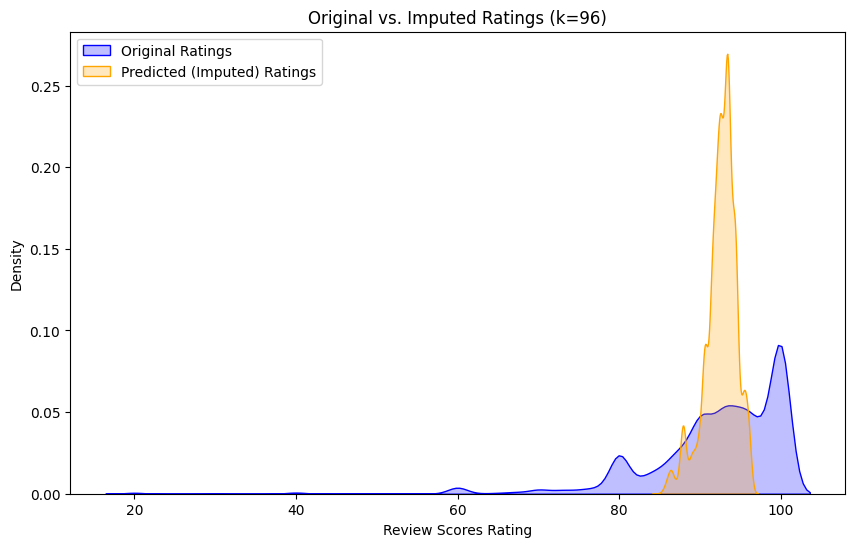

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

df_complete.loc[:, 'Price'] = df_complete['Price'].astype(str).str.replace(',', '').astype(float)
missing_reviews.loc[:, 'Price'] = missing_reviews['Price'].astype(str).str.replace(',', '').astype(float)

missing_reviews_clean = missing_reviews.dropna(subset=['Price', 'Beds'])

X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_k = 96
final_knn = KNeighborsRegressor(n_neighbors=optimal_k)
final_knn.fit(X_scaled, y)

X_missing_scaled = scaler.transform(missing_reviews_clean[['Price', 'Beds']])
predicted_ratings = final_knn.predict(X_missing_scaled)

plt.figure(figsize=(10,6))
sns.kdeplot(df_complete['Review Scores Rating'], label='Original Ratings', fill=True, color="blue")
sns.kdeplot(predicted_ratings, label='Predicted (Imputed) Ratings', fill=True, color="orange")
plt.title(f'Original vs. Imputed Ratings (k={optimal_k})')
plt.xlabel('Review Scores Rating')
plt.legend()
plt.show()

4. To choose k, I used a train/test split on the complete data. I tested several values to find which one produced the lowest Sum of Squared Errors (SSE). For this dataset, k=96 was the best fit, providing the most accurate balance for predicting the missing ratings.

5. Predicting Missing RatingsUsing the optimal $k=96$, I trained the model on the full set of complete cases. I then used this model to fill in the 8,323 missing ratings based on the Price and Beds for those specific listings.

6. To fill the missing ratings, I filtered the data to Review Scores Rating, Price, and Beds. I cleaned the Price column by removing commas and scaled both features for accuracy. By testing values to minimize error (SSE), I found $k=96$ was the best choice.The plot shows the predicted ratings are much more "peaked" than the original data. This happens because $k$-NN averages the scores of 96 neighbors, smoothing out the results. While the model finds the general trend, it loses the variety and outliers seen in real human reviews.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)